In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-75ce694f-39b6-0678-78bc-3e444901a92c)


In [3]:
!pwd
import os
os.chdir('/content/drive/My Drive/Traffic Sign Detection')
!pwd

/content
/content/drive/My Drive/Traffic Sign Detection


00244.txt: 
0 0.37536764705882353 0.511875 0.028676470588235293 0.04875
0 0.9264705882352942 0.464375 0.03235294117647059 0.05625

00245.txt: 
0 0.3588235294117647 0.56625 0.016176470588235296 0.0275
0 0.6341911764705882 0.561875 0.016911764705882352 0.02875

00249.txt: 
0 0.9029411764705882 0.544375 0.023529411764705882 0.04125

00251.txt: 
2 0.11911764705882352 0.590625 0.06764705882352941 0.11875



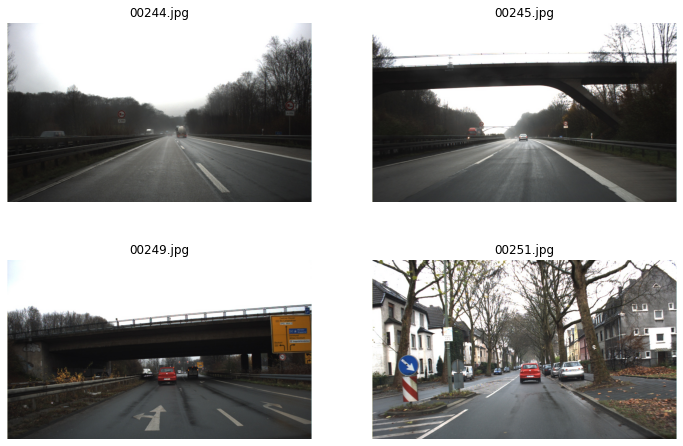

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("darknet/data/data/ts/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

#plt.savefig("dataset_examples.jpg", dpi=300)

In [ ]:
#!git clone https://github.com/AlexeyAB/darknet

In [5]:
%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/drive/MyDrive/Traffic Sign Detection/darknet


In [17]:
#!make

In [6]:
!ls data

data  data.data  data.names  labels  test.txt  train.txt


In [7]:
pwd

'/content/drive/MyDrive/Traffic Sign Detection/darknet'

In [16]:
#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

In [8]:
!chmod +x ./darknet

In [10]:
#!python process.py

In [27]:
%cd cfg
!sed -i 's/batch=1/batch=64/' yolov4-custom.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' yolov4-custom.cfg
%cd ..

/content/drive/MyDrive/Traffic Sign Detection/darknet/cfg
/content/drive/MyDrive/Traffic Sign Detection/darknet


In [20]:
!dir

3rdparty		 image_yolov3.sh	uselib
backup			 image_yolov4.sh	vcpkg.json
bad.list		 include		video_yolov3.sh
build			 json_mjpeg_streams.sh	video_yolov4.sh
build.ps1		 libdarknet.so		yolov4.conv.137
cfg			 LICENSE		yolov4.conv.137.1
chart.png		 Makefile		yolov4.conv.137.10
chart_yolov4-custom.png  net_cam_v3.sh		yolov4.conv.137.11
cmake			 net_cam_v4.sh		yolov4.conv.137.2
CMakeLists.txt		 obj			yolov4.conv.137.3
darknet			 predictions.jpg	yolov4.conv.137.4
DarknetConfig.cmake.in	 process.py		yolov4.conv.137.5
darknet_images.py	 README.md		yolov4.conv.137.6
darknet.py		 results		yolov4.conv.137.7
darknet_video.py	 scripts		yolov4.conv.137.8
data			 src			yolov4.conv.137.9


In [21]:
%cd /content/drive/MyDrive/Traffic Sign Detection/darknet/

/content/drive/MyDrive/Traffic Sign Detection/darknet


In [26]:
#!./darknet detector train data/data.data cfg/yolov4-custom.cfg yolov4.conv.137  -dont_show 
#!./darknet detector train data/data.data cfg/yolov4-custom.cfg backup/yolov4-custom_last.weights -dont_show

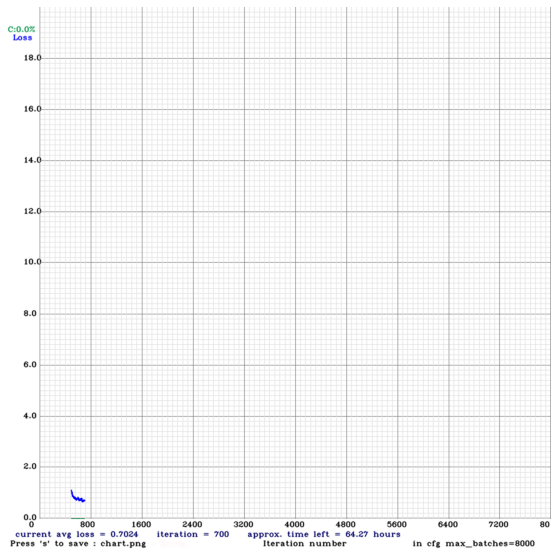

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

In [ ]:
!dir

3rdparty		 image_yolov3.sh	uselib
backup			 image_yolov4.sh	vcpkg.json
bad.list		 include		video_yolov3.sh
build			 json_mjpeg_streams.sh	video_yolov4.sh
build.ps1		 libdarknet.so		yolov4.conv.137
cfg			 LICENSE		yolov4.conv.137.1
chart.png		 Makefile		yolov4.conv.137.10
chart_yolov4-custom.png  net_cam_v3.sh		yolov4.conv.137.2
cmake			 net_cam_v4.sh		yolov4.conv.137.3
CMakeLists.txt		 obj			yolov4.conv.137.4
darknet			 predictions.jpg	yolov4.conv.137.5
DarknetConfig.cmake.in	 process.py		yolov4.conv.137.6
darknet_images.py	 README.md		yolov4.conv.137.7
darknet.py		 results		yolov4.conv.137.8
darknet_video.py	 scripts		yolov4.conv.137.9
data			 src


In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov4-custom.cfg
%cd ..

/content/drive/MyDrive/Traffic Sign Detection/darknet/cfg
/content/drive/MyDrive/Traffic Sign Detection/darknet


In [ ]:
!chmod +x ./darknet

In [ ]:
!dir

3rdparty		 image_yolov3.sh	uselib
backup			 image_yolov4.sh	vcpkg.json
bad.list		 include		video_yolov3.sh
build			 json_mjpeg_streams.sh	video_yolov4.sh
build.ps1		 libdarknet.so		yolov4.conv.137
cfg			 LICENSE		yolov4.conv.137.1
chart.png		 Makefile		yolov4.conv.137.10
chart_yolov4-custom.png  net_cam_v3.sh		yolov4.conv.137.2
cmake			 net_cam_v4.sh		yolov4.conv.137.3
CMakeLists.txt		 obj			yolov4.conv.137.4
darknet			 predictions.jpg	yolov4.conv.137.5
DarknetConfig.cmake.in	 process.py		yolov4.conv.137.6
darknet_images.py	 README.md		yolov4.conv.137.7
darknet.py		 results		yolov4.conv.137.8
darknet_video.py	 scripts		yolov4.conv.137.9
data			 src


In [ ]:
img_path = "data/data/test.jpg"
!./darknet detector test data/data.data cfg/yolov4-custom.cfg backup/yolov4-custom_last.weights {img_path} -dont-show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 166666666, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   

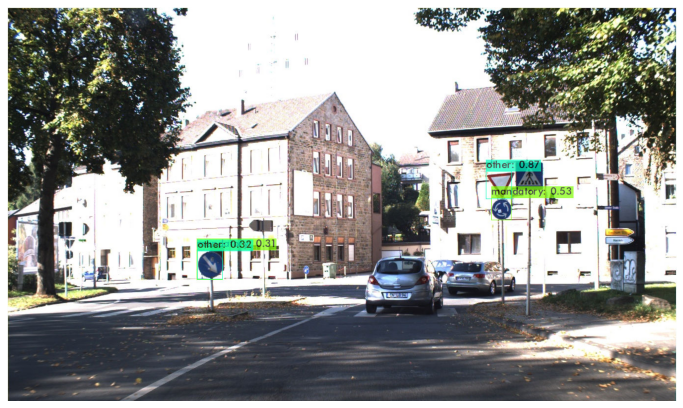

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)